## News Sentiment Analysis and Crypto price prediction

In [1]:
# Book 6 - Dogecoin - Random Forest Model and Evaluation

In [2]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline

# Needed for decision tree visualization
import pydotplus
from IPython.display import Image


## Dogecoin - Loading and Preprocessing Sentiment Data

In [3]:
# Loading data
file_path = Path("..\Group4\sentiment_closing.csv")
df_sentiment_closing = pd.read_csv('doge_trend.csv', index_col="Date", infer_datetime_format=True, parse_dates=True)
df_sentiment_closing.head()




,Close,Volume,Trend,Title_Sentiment_Negative,Title_Sentiment_Neutral,Title_Sentiment_Positive
Date,,,,,,
2022-02-11,0.144847,776730555,0,0,1,0
2022-02-12,0.144405,602699408,0,0,1,0
2022-02-13,0.148948,1581065491,1,0,1,0
2022-02-14,0.146003,898042727,0,0,1,0
2022-02-15,0.151761,674961496,1,0,0,1


## Creating the Features X and Target y Data

In [4]:
# Define features set
X = df_sentiment_closing.copy()
X.drop("Trend", axis=1, inplace=True)
X.head()



,Close,Volume,Title_Sentiment_Negative,Title_Sentiment_Neutral,Title_Sentiment_Positive
Date,,,,,
2022-02-11,0.144847,776730555,0,1,0
2022-02-12,0.144405,602699408,0,1,0
2022-02-13,0.148948,1581065491,0,1,0
2022-02-14,0.146003,898042727,0,1,0
2022-02-15,0.151761,674961496,0,0,1


In [5]:
# Define target vector
y = df_sentiment_closing[["Trend"]].values.reshape(-1,1)
y[:5]



array([[0],
       [0],
       [1],
       [0],
       [1]])

In [6]:
# Splitting into Train and Test sets
#split = int(0.7 * len(X))
#X_train = X[: split]
#X_test = X[split:]
#y_train = y[: split]
#y_test = y[split:]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)



In [7]:
# Creating StandardScaler instance
scaler = StandardScaler()



In [8]:
# Fitting Standard Scaler
X_scaler = scaler.fit(X_train)



In [9]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [10]:
# Confirm scaled values
df_X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
round(df_X_train_scaled.mean(), 0)


Close                      -0.0
Volume                      0.0
Title_Sentiment_Negative    0.0
Title_Sentiment_Neutral     0.0
Title_Sentiment_Positive    0.0
dtype: float64

In [11]:
round(df_X_train_scaled.std(), 0)


Close                       1.0
Volume                      1.0
Title_Sentiment_Negative    1.0
Title_Sentiment_Neutral     1.0
Title_Sentiment_Positive    1.0
dtype: float64

## Dogecoin - Create & Fit the Random Forest Model

In [12]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)



Once the random forest model is created, it is fitted with the training data.

In [13]:
# Fitting the model
#rf_model = rf_model.fit(X_train_scaled, y_train.ravel())  
rf_model = rf_model.fit(X_train_scaled, y_train)


/var/folders/sw/b_zvvxn52zv5n10dmvbj_jwm0000gn/T/ipykernel_3085/136854197.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model = rf_model.fit(X_train_scaled, y_train)


## Dogecoin - Making Predictions Using the Random Forest Model

In [14]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)


## Dogecoin - Model Evaluation

In [15]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)



In [16]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))


Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,5,0
Actual 1,1,1


Accuracy Score : 0.8571428571428571
Classification Report
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.50      0.67         2

    accuracy                           0.86         7
   macro avg       0.92      0.75      0.79         7
weighted avg       0.88      0.86      0.84         7



## Dogecoin - Feature Importance

In [17]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_



In [18]:
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)



[(0.4556699596317653, 'Volume'),
 (0.3979298592904662, 'Close'),
 (0.05696337656194981, 'Title_Sentiment_Negative'),
 (0.04674570741130855, 'Title_Sentiment_Positive'),
 (0.04269109710451009, 'Title_Sentiment_Neutral')]

<AxesSubplot:title={'center':'Features Importances'}, ylabel='1'>

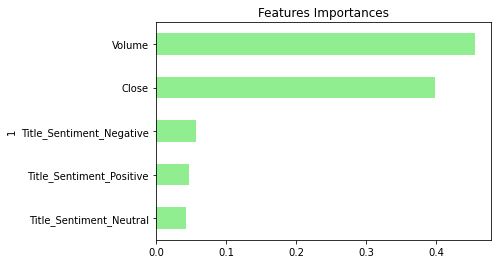

In [19]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

